##Code to generate and save Gaussian test data for PULearning validation

In [149]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [150]:
#define constants

num_positive = 500 #positive data
num_negative = 500 # negative data
fraction_labeled = 0.2 #fraction that is labeled 'as positive'

#define Gaussians mean and covariance matrices

Gaussian1_mean = [0,0]
Gaussian2_mean = [1,1]

Gaussian1_cov = [[1, 0.5], [0.5, 1]]
Gaussian2_cov = [[1, -0.5], [-0.5, 1]]

#random generated data
positive_data = np.random.multivariate_normal(Gaussian1_mean,Gaussian1_cov,num_positive)
negative_data = np.random.multivariate_normal(Gaussian2_mean,Gaussian2_cov,num_negative)

In [151]:
features = np.vstack((positive_data,negative_data))
num_labels = math.trunc(num_positive*fraction_labeled)
label = [1]*num_labels + [0]*(num_positive+num_negative-num_labels)

In [152]:
data = np.column_stack((label, features))
np.random.shuffle(data)

In [153]:
df = pd.DataFrame(data, columns=['label','x','y'])

In [154]:
df.head(10)

,label,x,y
0,0,-0.480546,-0.836217
1,0,-1.436866,-1.775890
2,0,2.615023,0.193393
3,0,2.274689,0.525186
4,0,-2.179536,3.078374
5,0,-0.742008,0.902645
6,0,0.246093,-0.059845
7,1,-1.101194,2.166284
8,0,-0.426054,3.819045
9,0,1.851539,0.901435


In [155]:
df.to_csv("../data/test_Gaussians.csv")

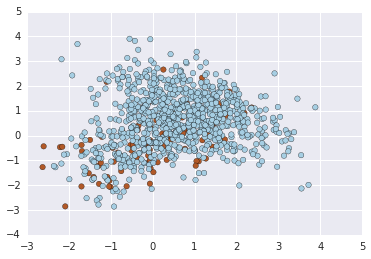

In [156]:
plt.figure()
plt.scatter(features[:, 0], features[:, 1], s=30, c=label, cmap=plt.cm.Paired)
plt.show()